<a href="https://colab.research.google.com/github/theaayushraman/Portfolio-Optimisation/blob/main/Portfolio_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Created by Aayush Raman


IMPORTING NECESSARY LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so that there is as little correlation between them as possible

In [5]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

stocks = ["ICICIBANK.NS","RELIANCE.NS","WIPRO.NS","ADANIENT.NS","TITAN.NS"]

start_date = "2017-01-01"
end_date = "2023-12-31"


PULLING THE DATA AND FORMING A DATABASE

In [6]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

stock_prices

,ICICIBANK.NS,RELIANCE.NS,WIPRO.NS,ADANIENT.NS,TITAN.NS
Date,,,,,
2017-01-02 00:00:00+05:30,220.661636,520.285400,171.755035,41.084290,325.151886
2017-01-03 00:00:00+05:30,222.807404,522.347107,170.097763,40.870728,338.977722
2017-01-04 00:00:00+05:30,219.917206,511.678619,173.230209,41.538113,350.174744
2017-01-05 00:00:00+05:30,225.303467,516.593323,174.978516,42.258892,348.616913
2017-01-06 00:00:00+05:30,226.091721,515.418579,171.172256,41.991940,345.842010
...,...,...,...,...,...
2023-12-22 00:00:00+05:30,994.299988,2565.050049,462.649994,2808.350098,3627.350098
2023-12-26 00:00:00+05:30,995.099976,2578.050049,470.100006,2865.449951,3656.699951
2023-12-27 00:00:00+05:30,1002.250000,2586.850098,470.950012,2843.350098,3689.250000


CALCULATING LOGRETURNS AND ADDING THAT DATA

In [7]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns = log_returns[1:]                                 # First row will have Nan value
log_returns.head()

,ICICIBANK.NS,RELIANCE.NS,WIPRO.NS,ADANIENT.NS,TITAN.NS
Date,,,,,
2017-01-03 00:00:00+05:30,0.009677,0.003955,-0.009696,-0.005212,0.041642
2017-01-04 00:00:00+05:30,-0.013057,-0.020636,0.018248,0.016197,0.032498
2017-01-05 00:00:00+05:30,0.024197,0.009559,0.010042,0.017203,-0.004459
2017-01-06 00:00:00+05:30,0.003493,-0.002277,-0.021993,-0.006337,-0.007992
2017-01-09 00:00:00+05:30,0.002128,0.002555,0.004353,0.001271,-0.001691


CALCULATING AVERAGE YEALY RETURNS

In [8]:
print(log_returns.mean()*NUM_TRADING_DAYS)

ICICIBANK.NS    0.219876
RELIANCE.NS     0.233783
WIPRO.NS        0.147208
ADANIENT.NS     0.618199
TITAN.NS        0.353666
dtype: float64


CALCULATING YEARLY VOLATILITY

In [9]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

ICICIBANK.NS    0.320214
RELIANCE.NS     0.292289
WIPRO.NS        0.261484
ADANIENT.NS     0.549817
TITAN.NS        0.310490
dtype: float64


## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

Explanation of the code below:

1. `w = np.random.random(len(stocks))` - In this line, a random array of numbers is generated using the NumPy library. The length of this array is the same as the number of stocks in your portfolio. These random numbers represent the weights assigned to each stock in the portfolio.

2. `w /= np.sum(w)` - Here, the random weights are normalized. This means that the sum of all the weights in the portfolio will add up to 1. This ensures that the portfolio's assets are allocated properly, so you're not overinvesting in any single stock.

4. `portfolio_weights.append(w)` - The weights of the stocks in the current portfolio are stored in a list for later analysis.

5. `port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS` - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by `log_returns.mean()`) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

6. `portfolio_returns.append(port_return)` - The estimated return for the current portfolio is stored in a list for later analysis.

7. `port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))` - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in `port_risk`.

8. `portfolio_risks.append(port_risk)` - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [10]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for _ in range(NUM_SIMULATIONS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7%

In [11]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the diffrent portfolios]

In [12]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": (portfolio_returns-risk_free_rate)/portfolio_risks})

In [13]:
portfolios

,Return,Risk,Sharpe
0,0.355979,0.252276,1.133596
1,0.265549,0.217495,0.899098
2,0.305234,0.219013,1.074065
3,0.317301,0.224413,1.101991
4,0.271881,0.208135,0.969954
...,...,...,...
99995,0.253795,0.203873,0.901517
99996,0.280658,0.239036,0.881281
99997,0.317757,0.241982,1.023864
99998,0.390589,0.300590,1.066533


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS

Plotting it

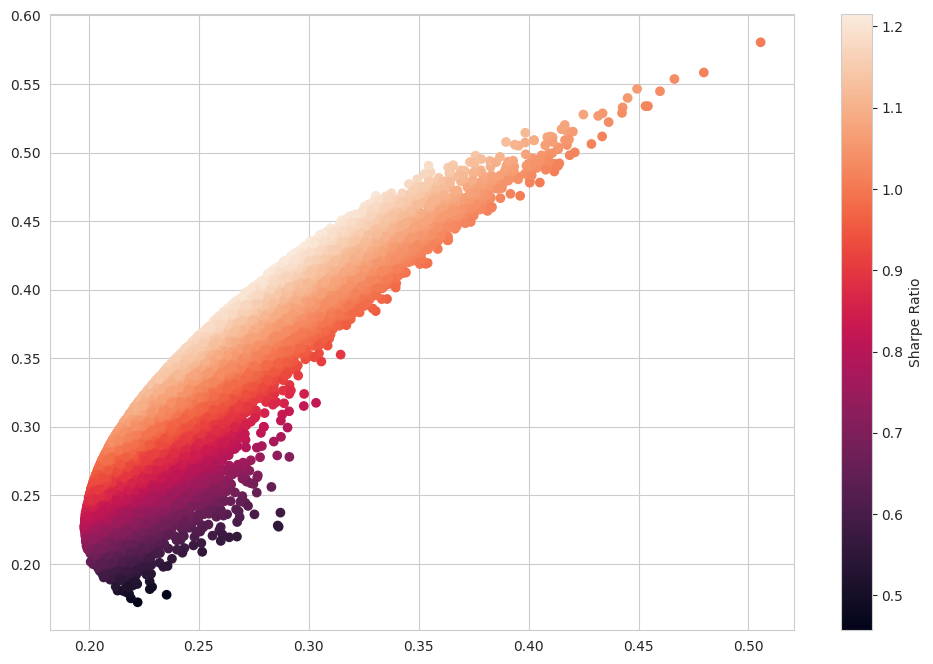

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


First let's find out the Portfolio with the maximum Sharpe Ratio

In [15]:
sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [16]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  1.2149668460665046
Corresponding Return =   0.4212985674112466
Corresponding Risk =   0.2891425132698784


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [17]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

ICICIBANK.NS : 0.011418932080225007
RELIANCE.NS : 0.12162437788950606
WIPRO.NS : 0.033539769411925956
ADANIENT.NS : 0.3427379128350538
TITAN.NS : 0.4906790077832892


Plotting the point of our portfolio with max sharpe

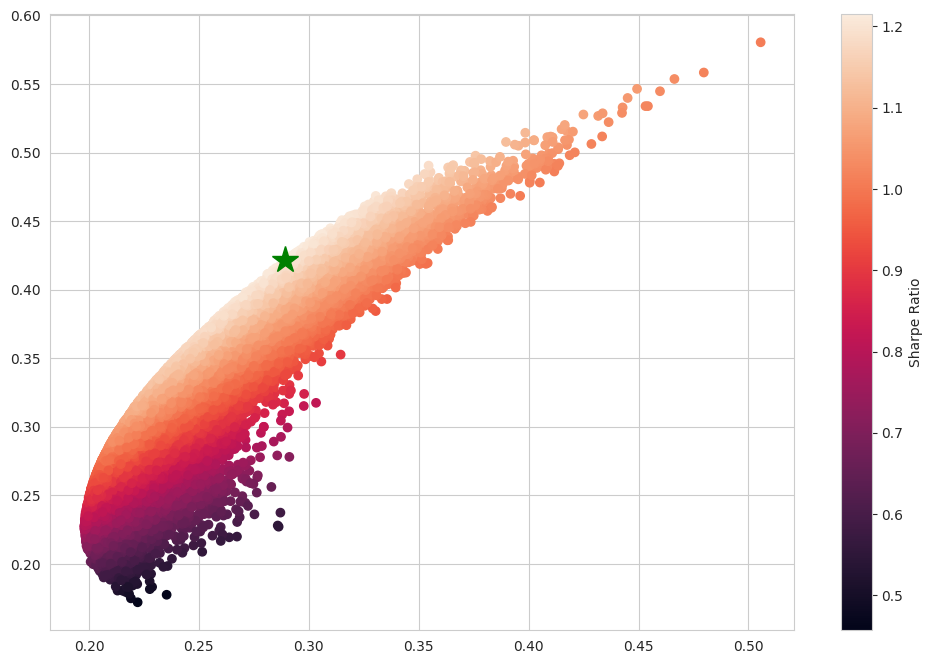

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [19]:
ind = 0
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i]==np.amin(portfolio_risks)):
        ind = i


In [20]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.19785086959419573
Corresponding Return =   0.2279822678716729


In [21]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

ICICIBANK.NS : 0.13401255894462957
RELIANCE.NS : 0.24278096408900346
WIPRO.NS : 0.3945316114869161
ADANIENT.NS : 0.01060505229378833
TITAN.NS : 0.21806981318566246


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

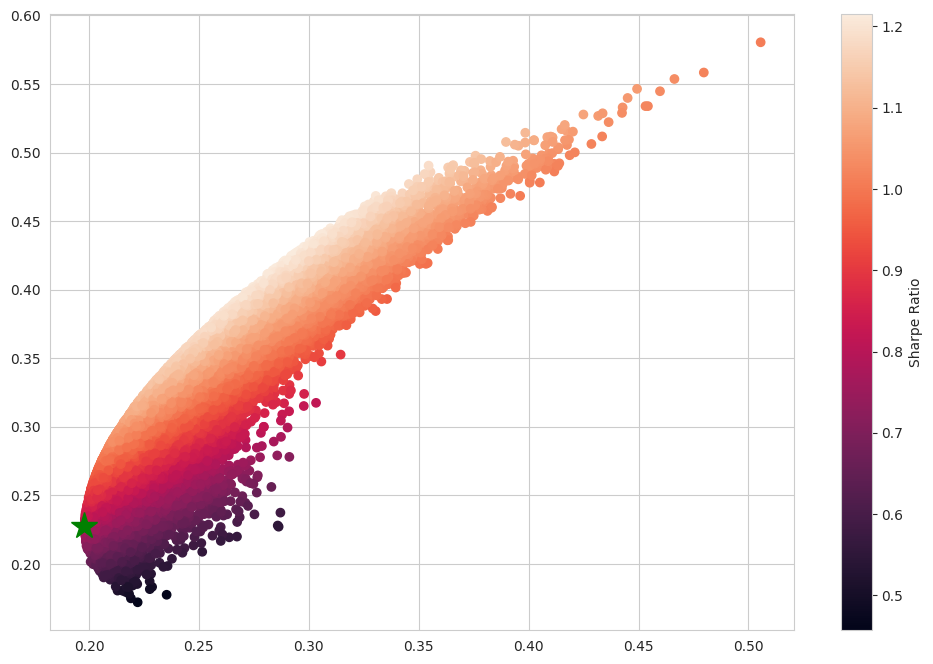

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk